### K-Means Model

For this problem, I use a K-Means model to segment the top 100 cities in the United States into similar groups using variables like: population size, growth rate, density, unemployment, income per capita, poverty, and race. Due to the varying scales of the features used, a min/max normalization was used to transform variables to scale between 0 and 1. I hoped to find 5–6 similar cities to plot and compare.

From this analysis we can see that the optimal number of clusters is 3. 



In [21]:
#Define local working drive
import os
os.chdir("")

In [22]:
#import libraraies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt #data visualization
import matplotlib.style as style
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline
import sys

#supress warnings
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")


In [23]:
#Load clean city data file to build K-Means model
clean_city_data = pd.read_csv('data/clean_city_data.csv') #read in file from data prep

In [24]:
########### PREP DATA FOR K-Means Model  ###########

#drop non-numeric and extra columns not used in our model
city_df_scale = clean_city_data.drop(columns=['Unnamed: 0','Rank', 'Name', 'county_name','city_state','state', 'pop_change', 'pop_change_per_year', 
                                    'est_pop_2011', 'est_pop_2012', 'est_pop_2013', 'est_pop_2014', 'est_pop_2015', 
                                    'est_pop_2016', 'est_pop_2017', 'est_pop_2018', 'est_pop_2019', 'City',
                                    'State_Code', '2018 total police force', 'total_employees',
                                    '2018 police officers', '2018 police civilians'])

#scale and center numeric values to 0-1 to eliminate potential bias due to large differences in the scale of different values
scaler = MinMaxScaler()

#select variables to scale
columns = ['2020_Pop', '2010_Census', 'Change', 'Density_km','Area_km', 'Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific','IncomePerCap', 'Poverty', 'Unemployment']

city_df_scale[columns] = scaler.fit_transform(city_df_scale[columns])


In [25]:
########### BUILD & TEST OPTIMAL K MEANS MODEL ###########
''' The purpose of this step is to determine the distortion and inertia of our K Means Model at a given for a given 
value of K. We repeat this step for the range K(1,10) and then compare using the Elbow Method to determine the optimal 
number of clusters for our model'''

distortions = [] 
inertias = [] 
mapping1 = {} 
mapping2 = {} 
K = range(1,10) #define the range of K values we would like to try
  
for k in K: 
    #Building and fitting the model 
    kmeanModel = KMeans(n_clusters=k).fit(city_df_scale) 
    kmeanModel.fit(city_df_scale)     
      
    distortions.append(sum(np.min(cdist(city_df_scale, kmeanModel.cluster_centers_, 
                      'euclidean'),axis=1)) / city_df_scale.shape[0]) 
    inertias.append(kmeanModel.inertia_) 
  
    mapping1[k] = sum(np.min(cdist(city_df_scale, kmeanModel.cluster_centers_, 
                 'euclidean'),axis=1)) / city_df_log.shape[0] 
    mapping2[k] = kmeanModel.inertia_ 

In [26]:
for key,val in mapping1.items(): 
    print(str(key)+' : '+str(val)) 

1 : 0.4814044827490755
2 : 0.42053035828751517
3 : 0.3755039173399966
4 : 0.3560877671522333
5 : 0.339428720395335
6 : 0.33029700694727526
7 : 0.31246642138340447
8 : 0.3053478320617383
9 : 0.2898416595307023


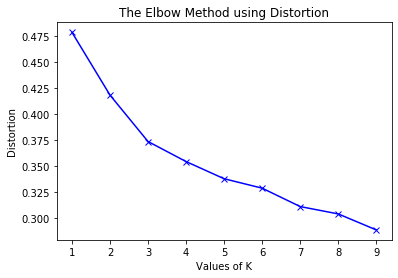

In [27]:
#Plot Elbow chart based on Intertia
plt.plot(K, distortions, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Distortion') 
plt.title('The Elbow Method using Distortion') 
plt.show() 

In [28]:
for key,val in mapping2.items(): 
    print(str(key)+' : '+str(val)) 

1 : 57.14229983205121
2 : 45.14130393257841
3 : 37.2173798163422
4 : 32.28508706639806
5 : 28.507223765678
6 : 25.849945124833077
7 : 23.959579721871417
8 : 22.00204312891718
9 : 20.742411018784747


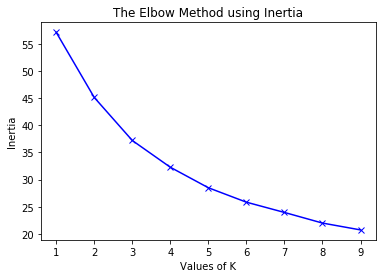

In [29]:
#Plot Elbow chart based on Intertia
plt.plot(K, inertias, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Inertia') 
plt.title('The Elbow Method using Inertia') 
plt.show()